,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


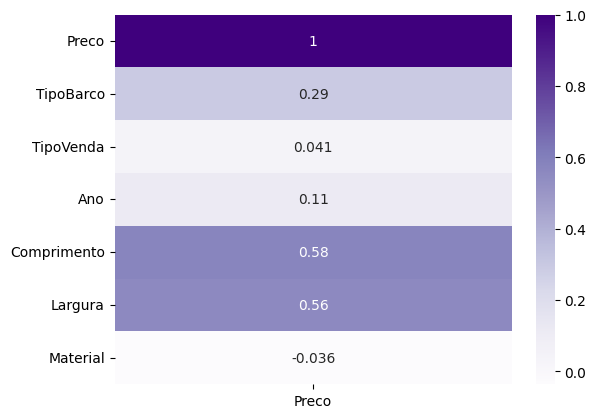

0.3525440007168723
0.7922865673187514


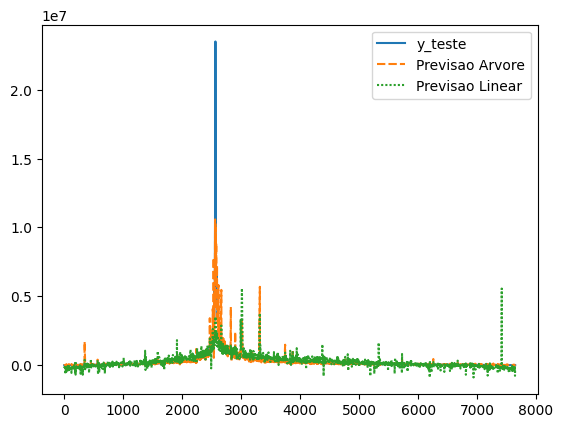

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


Valores previstos para os barcos novos: R$ 7311.48, R$ 10142.51 e R$ 20287.80


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

#correlação da tabela
display(tabela.corr()[["Preco"]])
#cria o grafico de calor
sns.heatmap(tabela.corr()[["Preco"]], cmap="Purples", annot=True)
#exibe o grafico
plt.show()

#separar x e y
y = tabela["Preco"]
x = tabela.drop("Preco", axis=1) #axis = 0 linhas e axis=1 colunas

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3)

modelo_regressaoLinear = LinearRegression()
modelo_arvoreDecisao = RandomForestRegressor()

modelo_regressaoLinear.fit(x_treino, y_treino)
modelo_arvoreDecisao.fit(x_treino, y_treino)

previsao_regressaoLinear = modelo_regressaoLinear.predict(x_teste)
previsao_arvoreDecisao = modelo_arvoreDecisao.predict(x_teste)

#calcular r² que é o percentual de precisão
print(r2_score(y_teste, previsao_regressaoLinear))
print(r2_score(y_teste, previsao_arvoreDecisao))

#ver os resultados
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar["Previsao Arvore"] = previsao_arvoreDecisao
tabela_auxiliar["Previsao Linear"] = previsao_regressaoLinear

sns.lineplot(data=tabela_auxiliar)
plt.show()

#tabela nova
tabela_nova = pd.read_csv("novos_barcos.csv")
display(tabela_nova)
previsao = modelo_arvoreDecisao.predict(tabela_nova)

print("Valores previstos para os barcos novos: R$ %.2f, R$ %.2f e R$ %.2f" %(previsao[0], previsao[1], previsao[2]))

